In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes_data_upload.csv')

In [3]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [6]:
numerical_attribute = ['Age']

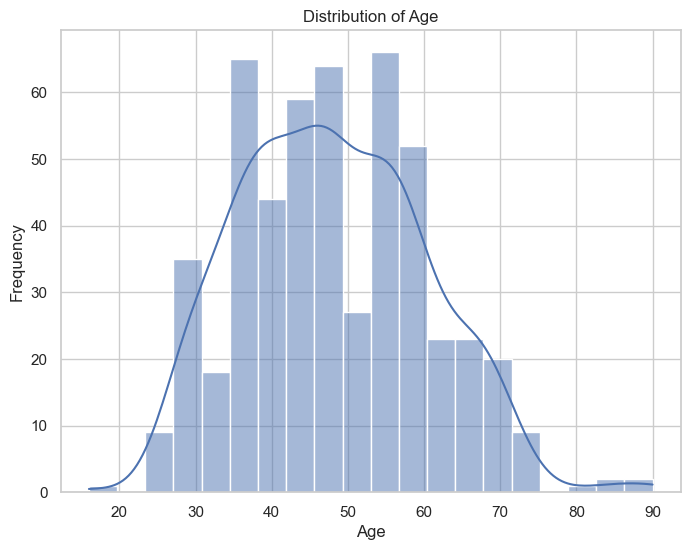

In [7]:
for attribute in numerical_attribute:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[attribute], bins=20, kde=True)
    plt.title(f'Distribution of {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Frequency')
    plt.show()

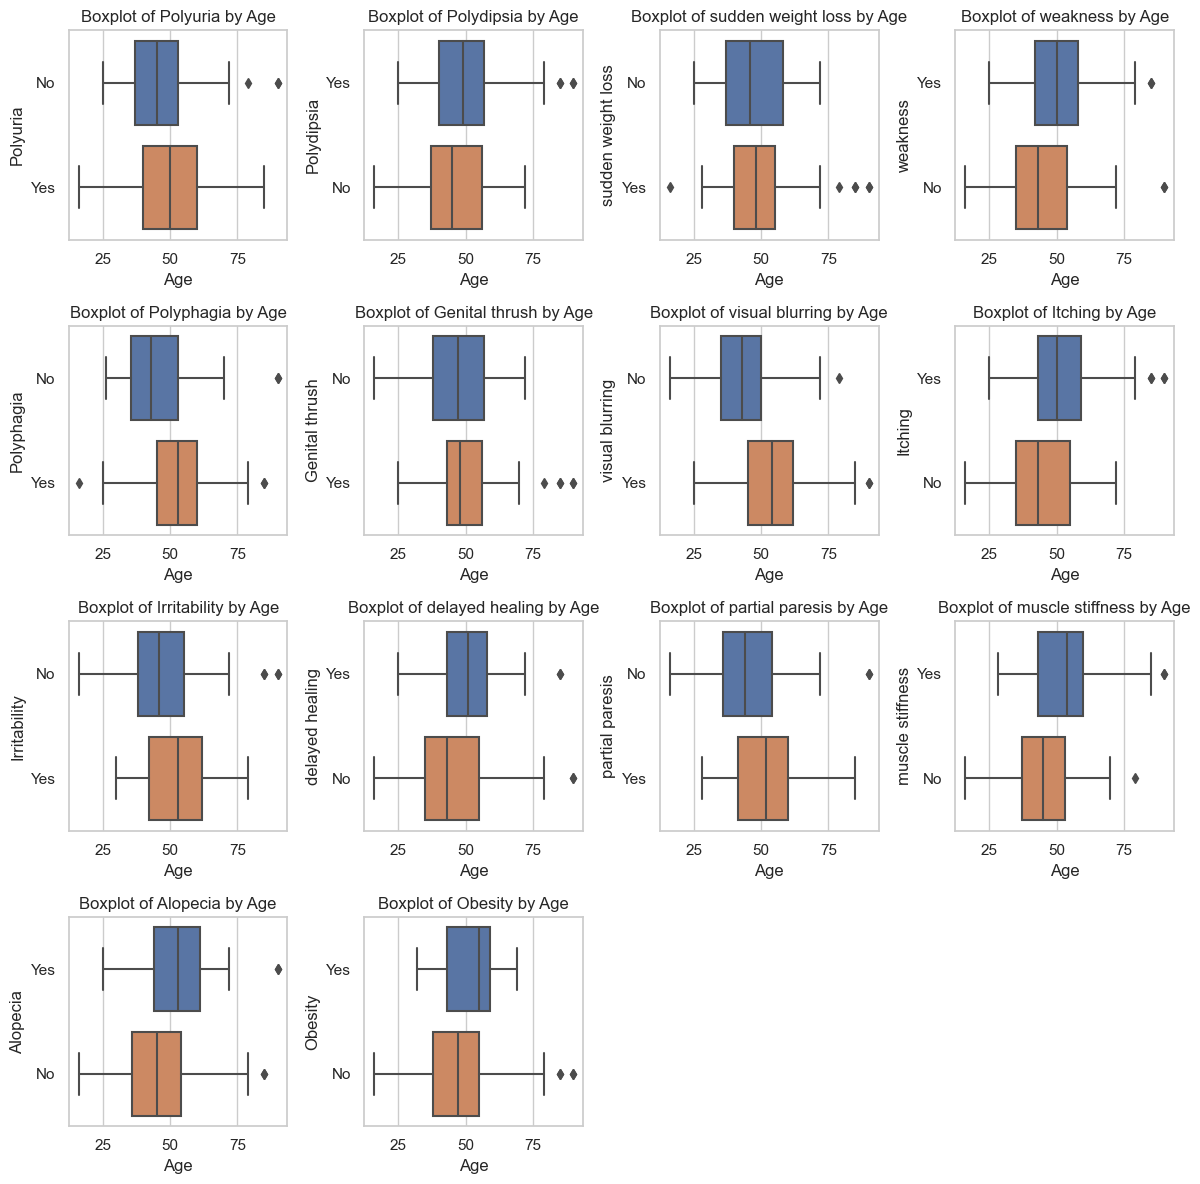

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame

# List of columns to create boxplots for (excluding 'Age', 'Gender', and 'Class' columns)
columns_to_plot = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                   'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

# Create a 4x4 grid of boxplots for each column, grouped by 'Age'
plt.figure(figsize=(12, 12))  # Adjust the figure size as needed

for i, col in enumerate(columns_to_plot, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, x='Age', y=col)
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.title(f'Boxplot of {col} by Age')

plt.tight_layout()
plt.show()


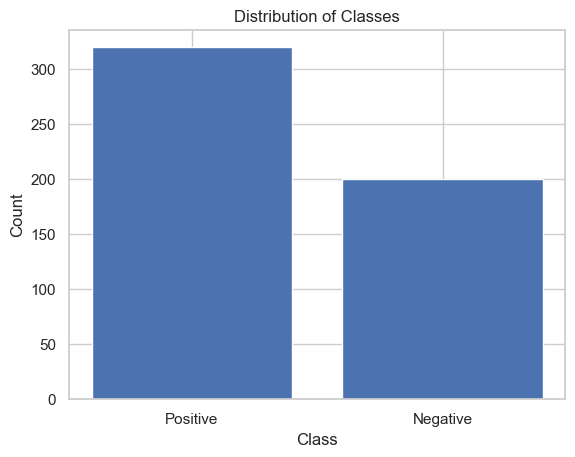

In [9]:
class_counts = df['class'].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

## One Hot Encoding

In [10]:
categorical_columns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                       'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity']

df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

   Age     class  Gender_Male  Polyuria_Yes  Polydipsia_Yes  \
0   40  Positive            1             0               1   
1   58  Positive            1             0               0   
2   41  Positive            1             1               0   
3   45  Positive            1             0               0   
4   60  Positive            1             1               1   

   sudden weight loss_Yes  weakness_Yes  Polyphagia_Yes  Genital thrush_Yes  \
0                       0             1               0                   0   
1                       0             1               0                   0   
2                       0             1               1                   0   
3                       1             1               1                   1   
4                       1             1               1                   0   

   visual blurring_Yes  Itching_Yes  Irritability_Yes  delayed healing_Yes  \
0                    0            1                 0               

## Outlier Removal using IQR

In [11]:
columns_to_check = ['Age', 'Polyuria_Yes', 'Polydipsia_Yes', 'sudden weight loss_Yes', 'weakness_Yes',
                    'Polyphagia_Yes', 'Genital thrush_Yes', 'visual blurring_Yes', 'Itching_Yes', 'Irritability_Yes',
                    'delayed healing_Yes', 'partial paresis_Yes', 'muscle stiffness_Yes', 'Alopecia_Yes', 'Obesity_Yes']

# Calculate the IQR for each column
Q1 = df_encoded[columns_to_check].quantile(0.25)
Q3 = df_encoded[columns_to_check].quantile(0.75)
IQR = Q3 - Q1

# Define a function to remove outliers based on IQR
def remove_outliers(col):
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    return df_encoded[(df_encoded[col] >= lower_bound) & (df_encoded[col] <= upper_bound)]

# Apply the function to each column and update the DataFrame
for col in columns_to_check:
    df_encoded = remove_outliers(col)

# ML MODELS

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [13]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df_encoded' is your one-hot encoded DataFrame

# Prepare data
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train different classification models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    report = classification_report(y_test, y_pred)
    print(report)

Random Forest Accuracy: 0.98
              precision    recall  f1-score   support

    Negative       1.00      0.96      0.98        27
    Positive       0.97      1.00      0.98        29

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56

Logistic Regression Accuracy: 0.96
              precision    recall  f1-score   support

    Negative       1.00      0.93      0.96        27
    Positive       0.94      1.00      0.97        29

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56

Support Vector Classifier Accuracy: 0.93
              precision    recall  f1-score   support

    Negative       0.93      0.93      0.93        27
    Positive       0.93      0.93      0.93        29

    accuracy                           0.93        56
   macro avg       0.93

In [14]:
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train a Random Forest classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
report = classification_report(y_test, y_pred)
print(report)

Accuracy: 0.98
              precision    recall  f1-score   support

    Negative       1.00      0.96      0.98        27
    Positive       0.97      1.00      0.98        29

    accuracy                           0.98        56
   macro avg       0.98      0.98      0.98        56
weighted avg       0.98      0.98      0.98        56



In [15]:
from sklearn.decomposition import PCA

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [17]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_

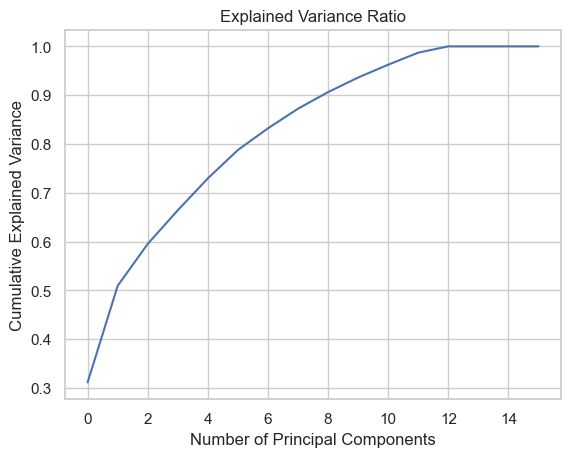

In [19]:
plt.plot(explained_variance_ratio.cumsum())
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance Ratio')
plt.show()

In [20]:
# Apply PCA
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_pca, y_train)
lr_predictions = lr_model.predict(X_test_pca)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_pca, y_train)
rf_predictions = rf_model.predict(X_test_pca)

# Train Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_pca, y_train)
svm_predictions = svm_model.predict(X_test_pca)

# Train k-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier(n_neighbors=42)
knn_model.fit(X_train_pca, y_train)
knn_predictions = knn_model.predict(X_test_pca)

# Evaluate models
def evaluate_model(predictions, model_name):
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions)
    print(f'{model_name} Model Accuracy: {accuracy:.2f}')
    print(f'{model_name} Model Classification Report:\n{report}')

evaluate_model(lr_predictions, 'Logistic Regression')
evaluate_model(rf_predictions, 'Random Forest')
evaluate_model(svm_predictions, 'Support Vector Machine')
evaluate_model(knn_predictions, 'k-Nearest Neighbors')

Logistic Regression Model Accuracy: 0.88
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.86      0.89      0.87        27
    Positive       0.89      0.86      0.88        29

    accuracy                           0.88        56
   macro avg       0.88      0.88      0.87        56
weighted avg       0.88      0.88      0.88        56

Random Forest Model Accuracy: 0.96
Random Forest Model Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      0.93      0.96        27
    Positive       0.94      1.00      0.97        29

    accuracy                           0.96        56
   macro avg       0.97      0.96      0.96        56
weighted avg       0.97      0.96      0.96        56

Support Vector Machine Model Accuracy: 0.91
Support Vector Machine Model Classification Report:
              precision    recall  f1-score   support

    Negative       0.89    

# LabelEncoder

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
df_l = df.copy()
# List of columns to encode
columns_to_encode = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
                     'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                     'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'Gender']

# Apply label encoding to categorical columns
label_encoder = LabelEncoder()
for col in columns_to_encode:
    df_l[col] = label_encoder.fit_transform(df_l[col])

In [23]:
# Prepare data
X = df_l.drop('class', axis=1)
y = df_l['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (if needed)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Initialize and train different classification models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Classifier': SVC(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{model_name} Accuracy: {accuracy:.4f}')
    report = classification_report(y_test, y_pred)
    print(report)

Random Forest Accuracy: 0.9904
              precision    recall  f1-score   support

    Negative       0.97      1.00      0.99        33
    Positive       1.00      0.99      0.99        71

    accuracy                           0.99       104
   macro avg       0.99      0.99      0.99       104
weighted avg       0.99      0.99      0.99       104

Logistic Regression Accuracy: 0.9231
              precision    recall  f1-score   support

    Negative       0.90      0.85      0.88        33
    Positive       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104

Support Vector Classifier Accuracy: 0.9904
              precision    recall  f1-score   support

    Negative       1.00      0.97      0.98        33
    Positive       0.99      1.00      0.99        71

    accuracy                           0.99       104
   macro avg     